In [33]:
from IPython.display import display, Math, Latex
import math
from math import sqrt, cos, sin, pi
import numpy as np
from numpy import linspace
import statsmodels.api as sm
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.stats import norm
from scipy.stats.kde import gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.mlab as ml
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import seaborn as sb
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [34]:
# physical constants for natural units c = G = 1
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [4]:
pi

3.141592653589793

In [7]:
'''Data for McConnell and Ma 2013 Mass BH - M Bulge'''

def MM13MassBulgeScatter(bulge):
    """
    M_BH-M_bulge. Bulge mass to black hole mass (note that M_bulge = Mstar; assume these are the same)
    McConnell and Ma (2013) relation below Figure 3
    Includes scatter in the relation, \epsilon = 0.34
    Answer in solar masses.
    """
    exponent = 8.46+1.05*log10(bulge / 1e11)
    ans_w_scatter = np.random.normal(exponent, 0.34)
    return 10**ans_w_scatter


def MM13MassBulgeNoScatter(bulge):
    """
    M_BH-M_bulge. Bulge mass to black hole mass (note that M_bulge = Mstar; assume these are the same)
    McConnell and Ma (2013) relation below Figure 3
    Includes scatter in the relation, \epsilon = 0.34
    Answer in solar masses.
    """
    exponent = 8.46+1.05*log10(bulge / 1e11)
    return 10**(exponent)

'creates data of predicted black hole masses given the mass of the bulge'
numsScatterMM13 = []
numsLoggedMM13 = []

for x in range(10000):
    numsScatterMM13.append(MM13MassBulgeScatter(3e11))
    numsLoggedMM13.append(log10(MM13MassBulgeScatter(3e11)))

In [13]:
'''Data for Kormendy and Ho 2013 Mass BH - M Bulge'''

#Only error in 0.49
def KH13MassBulgeScatterA(bulge):
    first_scatter = (np.random.normal(0.49, 0.06))
    ans = first_scatter * pow((bulge / 1e11), 1.16)
    return ans * 1e9

#only Error in exponent
def KH13MassBulgeScatterB(bulge):
    second_scatter = (np.random.normal(1.16, 0.08))
    ans = 0.49 * pow((bulge / 1e11), second_scatter)
    return ans * 1e9

#complete error
def KH13MassBulgeScatter(bulge):
    first_scatter = (np.random.normal(0.49, 0.06))
    second_scatter = (np.random.normal(1.16, 0.08))
    third_scatter = (np.random.normal((first_scatter * pow((bulge / 1e11), second_scatter)), 0.29))
    ans = third_scatter
    return ans * 1e9

def KH13MassBulgeNoScatter(bulge):
    ans = 0.49 * pow((bulge / 1e11), 1.16) * 1e9
    return ans
    

'creates data of predicted black hole masses given the mass of the bulge'
numsScatterKH13 = []
numsScatterLogAKH13 = []
numsScatterLogBKH13 = []
numsLoggedKH13 = []

for x in range(10000):
    numsScatterKH13.append(KH13MassBulgeScatter(3e11))
    numsScatterLogAKH13.append(log10(KH13MassBulgeScatterA(3e11)))
    numsScatterLogBKH13.append(log10(KH13MassBulgeScatterB(3e11)))
    numsLoggedKH13.append(log10(KH13MassBulgeScatter(3e11)))

In [14]:
'''Data for Haring and Rix 2004 Mass BH - M Bulge'''
def HR04MassBulgeNoScatter(bulge):
    ans = 8.20+(1.12*log10(bulge/1e11))
    return 10**(ans)

#Error in 8.2
def HR04MassBulgeScatterA(bulge):
    first_scatter = (np.random.normal(8.20, 0.1))
    ans = first_scatter+(1.12*log10(bulge/1e11))
    return 10**(ans)

#Error 1.12
def HR04MassBulgeScatterB(bulge):
    second_scatter = (np.random.normal(1.12, 0.06))
    ans = 8.20+(second_scatter*log10(bulge/1e11))
    return 10**(ans)

#All Error
def HR04MassBulgeScatter(bulge):
    first_scatter = (np.random.normal(8.20, 0.1))
    second_scatter = (np.random.normal(1.12, 0.06))
    ans = np.random.normal((first_scatter+(second_scatter*log10(bulge/1e11))), 0.3)
    return 10**(ans)

'creates data of predicted black hole masses given the mass of the bulge'

numsScatterHR04 = []
numsScatterLogAHR04 = []
numsScatterLogBHR04 = []
numsLoggedHR04 = []

for x in range(10000):
    numsScatterHR04.append(HR04MassBulgeScatter(3e11))
    numsScatterLogAHR04.append(log10(HR04MassBulgeScatterA(3e11)))
    numsScatterLogBHR04.append(log10(HR04MassBulgeScatterB(3e11)))
    numsLoggedHR04.append(log10(HR04MassBulgeScatter(3e11)))

In [19]:
'''Data for McConnell and Ma 2013 Mass BH - Sigma'''

def MM13SigmaScatter(sigma):
    """
    M_BH-M_bulge. Bulge mass to black hole mass (note that M_bulge = Mstar; assume these are the same)
    McConnell and Ma (2013) relation below Figure 3
    Includes scatter in the relation, \epsilon = 0.34
    Answer in solar masses.
    """
    exponent = 8.32+5.64*log10(sigma/200)
    ans_w_scatter = np.random.normal(exponent,0.38)
    return 10**ans_w_scatter

def MM13SigmaNoScatter(sigma):
    """
    M_BH-M_bulge. Bulge mass to black hole mass (note that M_bulge = Mstar; assume these are the same)
    McConnell and Ma (2013) relation below Figure 3
    Includes scatter in the relation, \epsilon = 0.34
    Answer in solar masses.
    """
    ans = 8.32+5.64*log10(sigma/200)
    return 10**ans



In [41]:
'''Data for Kormendy and Ho 2013 Mass BH - Sigma'''

#Only error in 0.49
def KH13SigmaScatterA(sigma):
    first_scatter = (np.random.normal(0.309, 0.037)) #non symmetric
    ans = first_scatter * pow((sigma / 200), 4.38)
    return ans * 1e9

#only Error in exponent
def KH13SigmaScatterB(sigma):
    second_scatter = (np.random.normal(4.38, 0.29))
    ans = 0.542 * pow((sigma / 200), second_scatter)
    return ans * 1e9

#complete error
def KH13SigmaScatter(sigma):
    first_scatter = (np.random.normal(0.309, 0.037))
    second_scatter = (np.random.normal(4.38, 0.29))
    third_scatter = (np.random.normal((first_scatter * pow((sigma / 200), second_scatter)), 0.29))
    ans = third_scatter
    return ans * 1e9

def KH13SigmaNoScatter(sigma):
    ans = 0.309 * pow((sigma / 200), 4.38) * 1e9
    return ans


In [45]:
print(KH13SigmaScatter(200))
print(KH13MassBulgeScatter(3e11))

print(log10(KH13SigmaNoScatter(80)))
print(log10(KH13SigmaScatterA(80)))
print(log10(KH13SigmaScatterB(80)))
print(log10(KH13SigmaScatter(80)))

avg = 0
for i in range(1000):
    avg += log10(KH13MassBulgeScatter(1e11))
print (avg/1000)

201850034.3288578
1225804582.2883217
6.74698124144131
6.817730188806839
7.014819143901095
nan
nan


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


In [22]:
'params'

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 4,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True}

# functions which will normalize the bins

def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    #bin_size = 0.05; min_edge = -3.5; max_edge = -1
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list


bin_list = auto_bin(0.1 ,7.5,10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


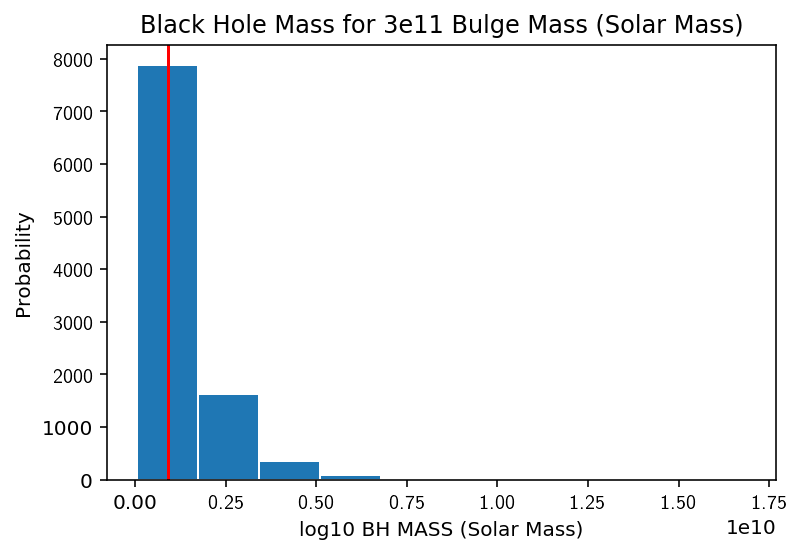

In [23]:
#MM13 full mass with scatter

plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass)")

plt.grid(False)
plt.rcParams['axes.facecolor'] = 'white'
plt.hist(numsScatterMM13, edgecolor = "w")
plt.axvline(x = MM13MassBulgeNoScatter(3e11), color = "red")

plt.rcParams.update(params)

plt.savefig("notLoggedMM13.pdf")



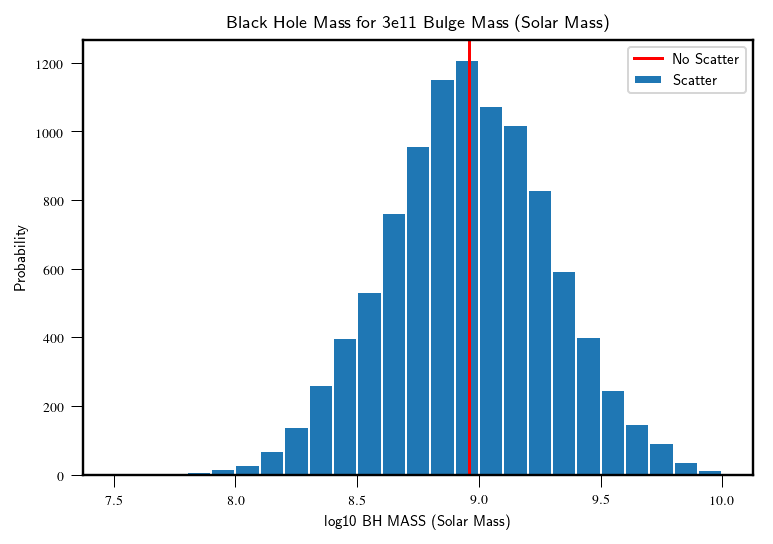

In [24]:
#MM13 logged mass with scatter

plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass)")

plt.grid(False)

plt.hist(numsLoggedMM13, edgecolor = "w", bins = bin_list)
plt.axvline(x = log10(MM13MassBulgeNoScatter(3e11)), color = "red")


plt.rcParams.update(params)

plt.legend(('No Scatter', 'Scatter'),loc='upper right')


plt.savefig("logged.pdf")



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


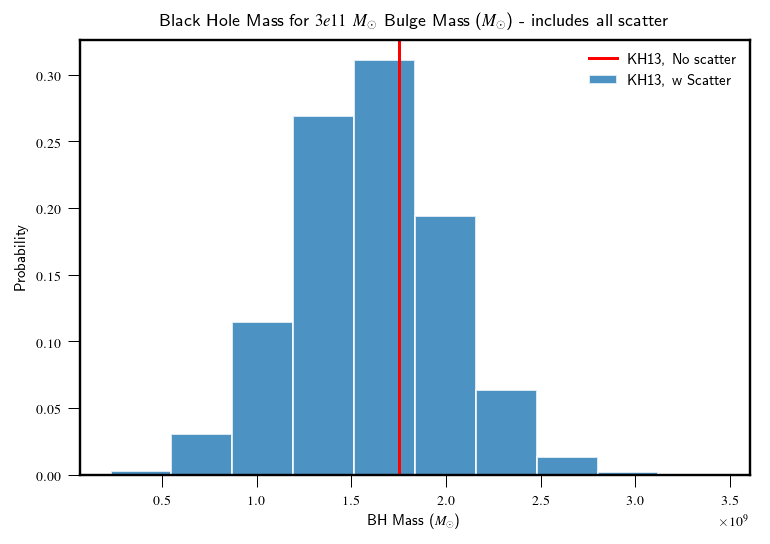

In [25]:
#KH13 full mass with scatter

fig = plt.figure()
ax = fig.add_subplot(111)

bin_list = auto_bin(0.1 ,7,11) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.
weights = hist_weight(numsScatterKH13)

plt.hist(numsScatterKH13, weights=weights, alpha = 0.8, align='left', color = 'C0', label = "KH13, w Scatter", edgecolor = "w")
plt.axvline(KH13MassBulgeNoScatter(3e11), color='red', label = "KH13, No scatter")
plt.xlabel("BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"Black Hole Mass for $3e11~M_\odot$ Bulge Mass ($M_\odot$) - includes all scatter")
plt.legend(frameon=False)
#plt.tight_layout()
plt.savefig("KH13_bh_host.pdf")


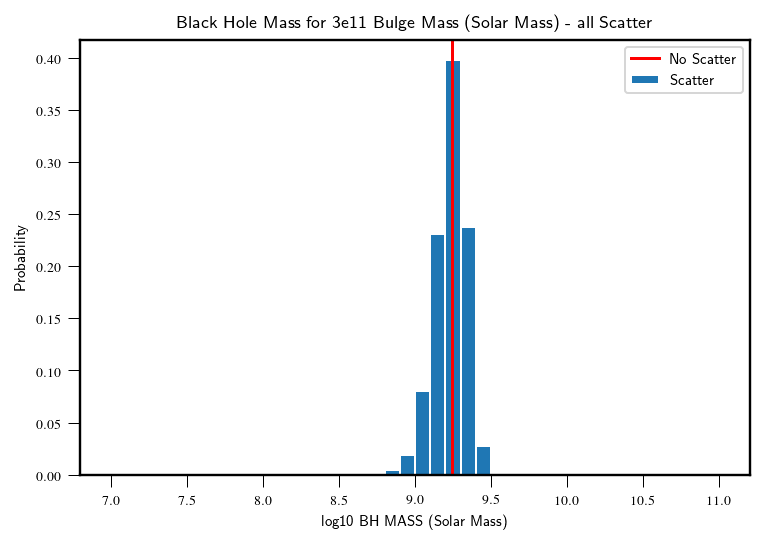

In [26]:
#KH13 logged mass with scatter

plt.xlabel("log10 BH MASS (Solar Mass)")
plt.ylabel("Probability")
plt.title("Black Hole Mass for 3e11 Bulge Mass (Solar Mass) - all Scatter")

plt.grid(False)
weights = hist_weight(numsLoggedKH13)

plt.hist(numsLoggedKH13, bins = bin_list, edgecolor = "w", weights = weights)
plt.axvline(x = log10(KH13MassBulgeNoScatter(3e11)), color = "red")



#plt.rcParams.update(params)

plt.legend(('No Scatter', 'Scatter'),loc='upper right')


plt.savefig("logged.pdf")

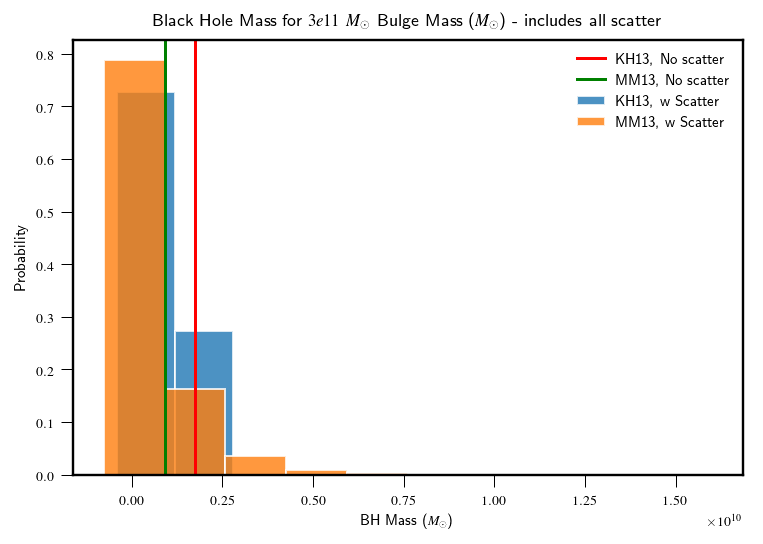

In [27]:
#MM13 and KH13 full mass with scatter

fig = plt.figure()
ax = fig.add_subplot(111)

#bin_list = auto_bin(0.1 ,7,11) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.
weightsKH = hist_weight(numsScatterKH13)
weightsMM = hist_weight(numsScatterMM13)

plt.hist(numsScatterKH13, weights=weightsKH, bins = 2, alpha = 0.8, align='left', color = 'C0', label = "KH13, w Scatter", edgecolor = "w")
plt.hist(numsScatterMM13, weights=weightsMM, alpha = 0.8, align='left', color = 'C1', label = "MM13, w Scatter", edgecolor = "w")

plt.axvline(KH13MassBulgeNoScatter(3e11), color='red', label = "KH13, No scatter")
plt.axvline(MM13MassBulgeNoScatter(3e11), color='green', label = "MM13, No scatter")


plt.xlabel("BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"Black Hole Mass for $3e11~M_\odot$ Bulge Mass ($M_\odot$) - includes all scatter")
plt.legend(frameon=False)
#plt.tight_layout()
plt.savefig("KH13_bh_host.pdf")



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


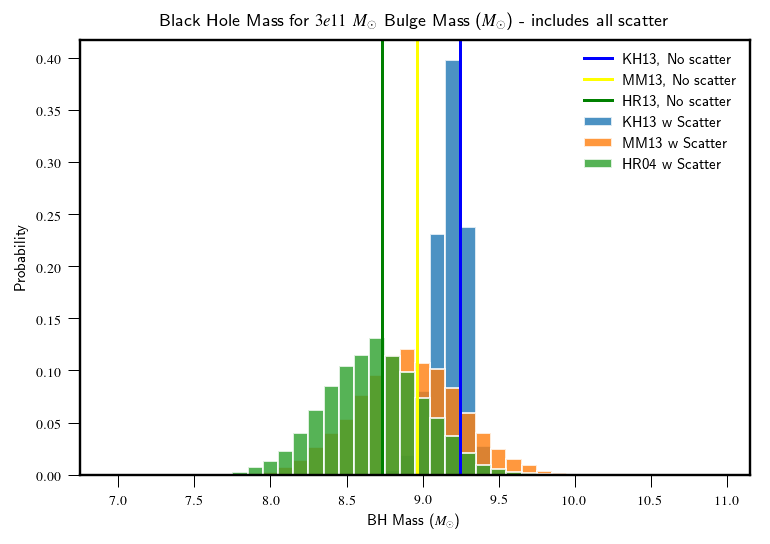

In [28]:
#KH13 and MM13 logged mass with scatter
plt.grid(False)

bin_list = auto_bin(0.1 ,7,11) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.

weightsKHL = hist_weight(numsLoggedKH13)
weightsMML = hist_weight(numsLoggedMM13)
weightsHRL = hist_weight(numsLoggedHR04)


plt.hist(numsLoggedKH13, bins = bin_list,  weights=weightsKHL, alpha = 0.8, align='left', color = 'C0', label = "KH13 w Scatter", edgecolor = "w")
plt.hist(numsLoggedMM13,bins = bin_list, weights=weightsMML, alpha = 0.8, align='left', color = 'C1', label = "MM13 w Scatter", edgecolor = "w")
plt.hist(numsLoggedHR04,bins = bin_list, weights=weightsHRL, alpha = 0.8, align='left', color = 'C2', label = "HR04 w Scatter", edgecolor = "w")



plt.axvline(log10(KH13MassBulgeNoScatter(3e11)), color='blue', label = "KH13, No scatter")
plt.axvline(log10(MM13MassBulgeNoScatter(3e11)), color='yellow', label = "MM13, No scatter")
plt.axvline(log10(HR04MassBulgeNoScatter(3e11)), color='green', label = "HR13, No scatter")


plt.xlabel("BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"Black Hole Mass for $3e11~M_\odot$ Bulge Mass ($M_\odot$) - includes all scatter")
plt.legend(frameon=False)

#plt.rcParams.update(params)

plt.savefig("logged.pdf")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


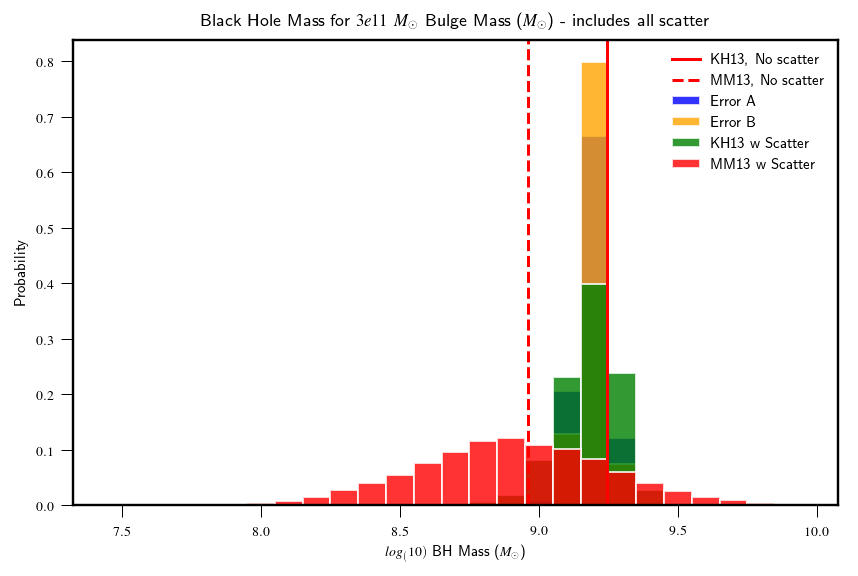

In [29]:
# all graphs together 

#constant
plt.grid(False)

bin_list = auto_bin(0.1 ,7.5,10) #in log space, I want my bins to be 0.1 dex wide and go from 7 to 11.

weightsKHL = hist_weight(numsLoggedKH13)
weightsMML = hist_weight(numsLoggedMM13)
weightsKH = hist_weight(numsScatterKH13)
weightsMM = hist_weight(numsScatterMM13)
weightsKHA = hist_weight(numsScatterLogAKH13)
weightsKHB = hist_weight(numsScatterLogBKH13)

#no scatter plot -- good
plt.axvline(log10(KH13MassBulgeNoScatter(3e11)), color='red', label = "KH13, No scatter")
plt.axvline(log10(MM13MassBulgeNoScatter(3e11)), color='red', label = "MM13, No scatter", ls = "--")

#Errors A and B
plt.hist(numsScatterLogAKH13,bins = bin_list, weights=weightsKHA, alpha = 0.8, align='left', color = 'blue', label = "Error A", edgecolor = "w")
plt.hist(numsScatterLogBKH13,bins = bin_list, weights=weightsKHB, alpha = 0.8, align='left', color = 'orange', label = "Error B", edgecolor = "w")


#Scatter with Errors
plt.hist(numsLoggedKH13, bins = bin_list,  weights=weightsKHL, alpha = 0.8, align='left', color = 'green', label = "KH13 w Scatter", edgecolor = "w")
plt.hist(numsLoggedMM13, bins = bin_list, weights=weightsMML, alpha = 0.8, align='left', color = 'red', label = "MM13 w Scatter", edgecolor = "w")

#style
plt.xlabel("$log_(10)$ BH Mass ($M_\odot$)")
plt.ylabel("Probability")
plt.title(r"Black Hole Mass for $3e11~M_\odot$ Bulge Mass ($M_\odot$) - includes all scatter")
plt.legend(frameon=False)
plt.tight_layout()

plt.savefig("all.pdf")





